In [1]:
Pkg.add("ScikitLearn")
Pkg.update()
using ScikitLearn

INFO: Nothing to be done
INFO: Updating METADATA...
INFO: Updating cache of DataFrames...
INFO: Updating cache of DataFrames...
INFO: Computing changes...
INFO: No packages to install, update or remove


In [2]:
Pkg.add("RDatasets")

INFO: Nothing to be done


In [3]:
using RDatasets: dataset

iris = dataset("datasets", "iris")

# ScikitLearn.jl expects arrays, but DataFrames can also be used - see
# the corresponding section of the manual
X = convert(Array, iris[[:SepalLength, :SepalWidth, :PetalLength, :PetalWidth]])
y = convert(Array, iris[:Species])


150-element Array{String,1}:
 "setosa"   
 "setosa"   
 "setosa"   
 "setosa"   
 "setosa"   
 "setosa"   
 "setosa"   
 "setosa"   
 "setosa"   
 "setosa"   
 "setosa"   
 "setosa"   
 "setosa"   
 ⋮          
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"

In [4]:
# This model requires scikit-learn. See
# http://scikitlearnjl.readthedocs.io/en/latest/models/#installation
@sk_import linear_model: LogisticRegression

In [13]:
model = LogisticRegression(fit_intercept=true)

PyObject LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [15]:
fit!(model, X, y)
model0 = fit(model, X, y)

accuracy = sum(predict(model, X) .== y) / length(y)
println("accuracy: $accuracy")

accuracy: 0.93


In [7]:
predict_proba(model, X)

150×3 Array{Float64,2}:
 0.87803      0.121959   1.07949e-5
 0.797058     0.202911   3.02949e-5
 0.851998     0.147976   2.58551e-5
 0.823406     0.176536   5.78218e-5
 0.896035     0.103954   1.11907e-5
 0.926234     0.0737528  1.29613e-5
 0.894097     0.105864   3.92166e-5
 0.860034     0.139947   1.88751e-5
 0.801029     0.198887   8.46026e-5
 0.792662     0.207312   2.56052e-5
 0.890486     0.109508   6.16178e-6
 0.861801     0.138165   3.43689e-5
 0.785364     0.214608   2.73661e-5
 ⋮                                 
 0.00431283   0.317469   0.678218  
 0.00117132   0.3003     0.698528  
 0.000450214  0.2008     0.79875   
 0.00216404   0.247614   0.750222  
 0.000814031  0.293447   0.705739  
 0.000293581  0.223397   0.77631   
 0.000455252  0.152049   0.847495  
 0.00116469   0.23233    0.766505  
 0.000920404  0.379263   0.619817  
 0.00146455   0.297584   0.700951  
 0.00110986   0.129832   0.869058  
 0.00169379   0.279973   0.718333  

In [11]:
using ScikitLearn.CrossValidation: cross_val_score

cross_val_score(LogisticRegression(), X, y; cv=5)  # 5-fold

5-element Array{Float64,1}:
 1.0     
 0.966667
 0.933333
 0.9     
 1.0     

#Classifier Comparison

In [8]:


# Python Code source: Gaël Varoquaux
#                     Andreas Müller
# Julia adaptation: Cédric St-Jean
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause
Pkg.add("DecisionTree")
using ScikitLearn
using PyCall
using PyPlot
using ScikitLearn.CrossValidation: train_test_split
using DecisionTree
#using ScikitLearn.Models: DecisionTreeClassifier, RandomForestClassifier, AdaBoostStumpClassifier
@pyimport matplotlib.colors as mplc
@sk_import preprocessing: StandardScaler
@sk_import datasets: (make_moons, make_circles, make_classification)
@sk_import neighbors: KNeighborsClassifier
@sk_import svm: SVC
@sk_import naive_bayes: GaussianNB
@sk_import discriminant_analysis: (LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis)
using ScikitLearn.Utils: meshgrid


INFO: Nothing to be done


In [9]:
h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Decision Tree (Julia)",
         "Random Forest (Julia)", "AdaBoost (Julia)", "Naive Bayes", "Linear Discriminant Analysis",
         "Quadratic Discriminant Analysis"]
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(pruning_purity_threshold=0.8),
    RandomForestClassifier(ntrees=20),
    # Note: scikit-learn's adaboostclassifier is better than DecisionTree.jl in this instance
    # because it's not restricted to stumps, and the data isn't axis-aligned
    AdaBoostStumpClassifier(niterations=30),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()
]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
srand(42)
X += 2 * rand(size(X)...)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ];

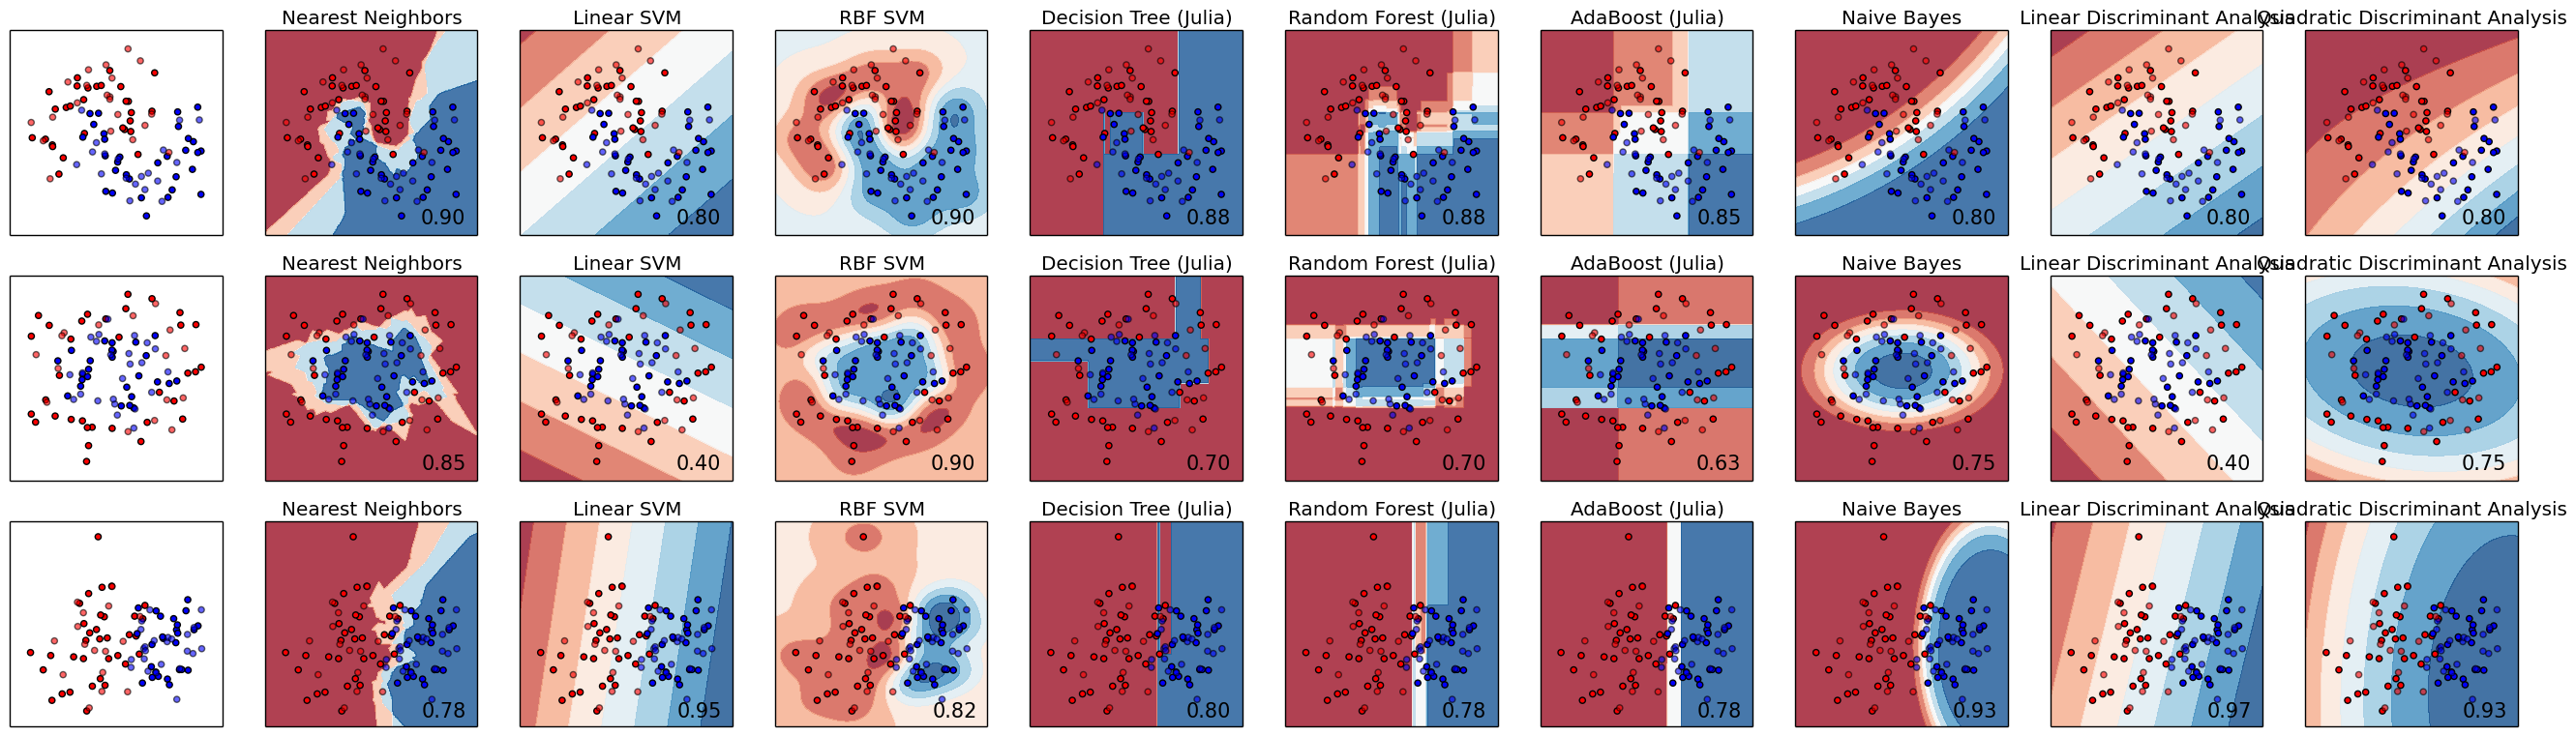

In [16]:
fig = figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds in datasets
    # preprocess dataset, split into training and test part
    X, y = ds
    X = fit_transform!(StandardScaler(), X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

    x_min, x_max = minimum(X[:, 1]) - .5, maximum(X[:, 1]) + .5
    y_min, y_max = minimum(X[:, 2]) - .5, maximum(X[:, 2]) + .5
    xx, yy = meshgrid(x_min:h:x_max, y_min:h:y_max)

    # just plot the dataset first
    cm = PyPlot.cm[:RdBu]
    cm_bright = mplc.ListedColormap(["#FF0000", "#0000FF"])
    ax = subplot(length(datasets), length(classifiers) + 1, i)
    # Plot the training points
    ax[:scatter](X_train[:, 1], X_train[:, 2], c=y_train, cmap=cm_bright)
    # and testing points
    ax[:scatter](X_test[:, 1], X_test[:, 2], c=y_test, cmap=cm_bright, alpha=0.6)

    ax[:set_xlim](minimum(xx), maximum(xx))
    ax[:set_ylim](minimum(yy), maximum(yy))
    ax[:set_xticks](())
    ax[:set_yticks](())
    i += 1

    # iterate over classifiers
    for (name, clf) in zip(names, classifiers)
        ax = subplot(length(datasets), length(classifiers) + 1, i)
        fit!(clf, X_train, y_train)
        scor = score(clf, X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, m_max]x[y_min, y_max].
        try 
            # Not implemented for some
            Z = decision_function(clf, hcat(xx[:], yy[:]))
        catch
            Z = predict_proba(clf, hcat(xx[:], yy[:]))[:, 2]
        end

        # Put the result into a color plot
        Z = reshape(Z, size(xx)...)
        ax[:contourf](xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        ax[:scatter](X_train[:, 1], X_train[:, 2], c=y_train, cmap=cm_bright)
        # and testing points
        ax[:scatter](X_test[:, 1], X_test[:, 2], c=y_test, cmap=cm_bright,
                   alpha=0.6)

        ax[:set_xlim](minimum(xx), maximum(xx))
        ax[:set_ylim](minimum(yy), maximum(yy))
        ax[:set_xticks](())
        ax[:set_yticks](())
        ax[:set_title](name)

        ax[:text](maximum(xx) - .3, minimum(yy) + .3, @sprintf("%.2f", scor),
                size=15, horizontalalignment="right")
        i += 1
    end
end
fig[:subplots_adjust](left=.02, right=.98)